# 마스크 착용상태 분류 EDA
카메라로 촬영한 사람 얼굴 이미지의 마스크 착용 여부를 판단하는 Task

### 1. 사용할 패키지 불러오기

In [3]:
# !pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 학습에 사용되는 데이터 (train.csv) 불러오기

In [2]:
mask_data = pd.read_csv('../input/data/train/train.csv')

print ('학습에 사용되는 사람의 수 :', len(mask_data))
mask_data.sample(5)

학습에 사용되는 사람의 수 : 2700


,id,gender,race,age,path
1328,003352,female,Asian,20,003352_female_Asian_20
1958,004489,male,Asian,23,004489_male_Asian_23
2649,006721,male,Asian,20,006721_male_Asian_20
648,001331,female,Asian,23,001331_female_Asian_23
1528,003632,male,Asian,43,003632_male_Asian_43


### 3. 기본 정보 확인
#### 3-1. 결측치 확인

In [3]:
mask_data.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

- 2700명 중, 결측 데이터는 존재하지 않는다

#### 3-2. 입력 이미지 크기 확인

img size = (384, 512)


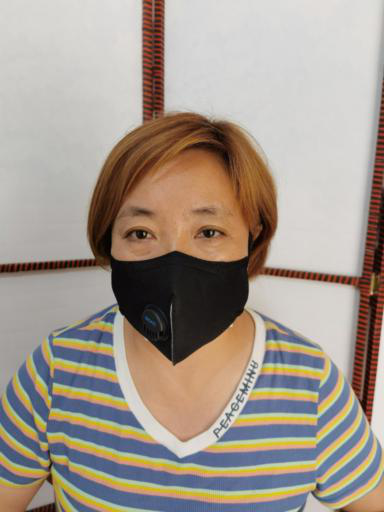

In [4]:
from PIL import Image
img = Image.open("../input/data/train/images/000001_female_Asian_45/mask1.jpg")
print ('img size =', img.size)
display(img)

- 모든 이미지의 크기는 384x512

### 4. 데이터의 성별별 분포 확인

남자 : 1042
여자 : 1658


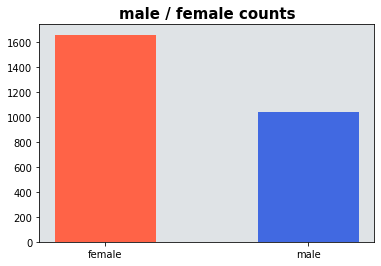

In [5]:
fig, ax = plt.subplots()
group = mask_data['gender'].value_counts().sort_index()
print ('남자 :', group['male'])
print ('여자 :', group['female'])
ax.bar(group.index, group, width=0.5, color=['tomato', 'royalblue'])
ax.set_facecolor('#DFE3E6')
ax.set_title('male / female counts', fontweight='semibold', fontsize=15)
plt.show()

- 전체 2700명 중 여자는 1658명, 남자는 1042명 존재

### 5. 데이터의 나이대별 분포 확인
#### 5-1. 분포 확인 (나이 1단위)

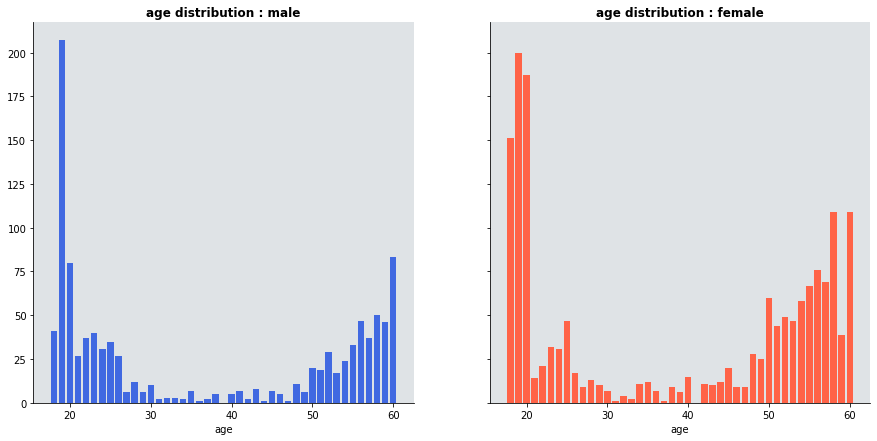

In [9]:
grp = mask_data.groupby('gender')['age'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(grp['male'].index, grp['male'], color='royalblue', zorder=5)
axes[1].bar(grp['female'].index, grp['female'], color='tomato', zorder=5)

axes[0].set_title('age distribution : male', fontweight='semibold')
axes[1].set_title('age distribution : female', fontweight='semibold')

for ax in axes:
    ax.set_facecolor('#DFE3E6')
    ax.set_xlabel('age')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

#### 5-2. 분포 확인 (나이 10 단위)

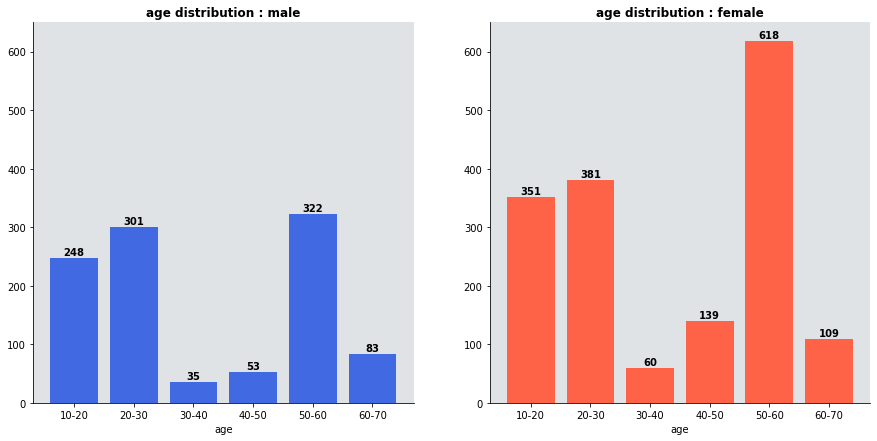

In [10]:
bins = list(range(0, 91, 10))
bins_label = [str(x) + "-" + str(x+10) for x in bins]
mask_data['age_level'] = pd.cut(mask_data['age'] ,bins, right=False, labels=bins_label[:-1])

# 데이터 분포 표시
grp = mask_data.groupby('gender')['age_level'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(grp['male'].index, grp['male'], color='royalblue', zorder=5)
axes[1].bar(grp['female'].index, grp['female'], color='tomato', zorder=5)

# 제목 설정
axes[0].set_title('age distribution : male', fontweight='semibold')
axes[1].set_title('age distribution : female', fontweight='semibold')

# 배경설정, xlaebl설정, 축제거
for ax in axes:
    ax.set_facecolor('#DFE3E6')
    ax.set_xlabel('age')
    ax.set_ylim(0, 650)
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

# bar별 개수 표시
for idx, value in zip(grp['male'].index, grp['male']):
    axes[0].text(idx, value+5, s=value, ha='center', fontweight='bold', zorder=5)
    
for idx, value in zip(grp['female'].index, grp['female']):
    axes[1].text(idx, value+5, s=value, ha='center', fontweight='bold', zorder=5)

#### 5-3. 분포 확인 (나이 30 단위)

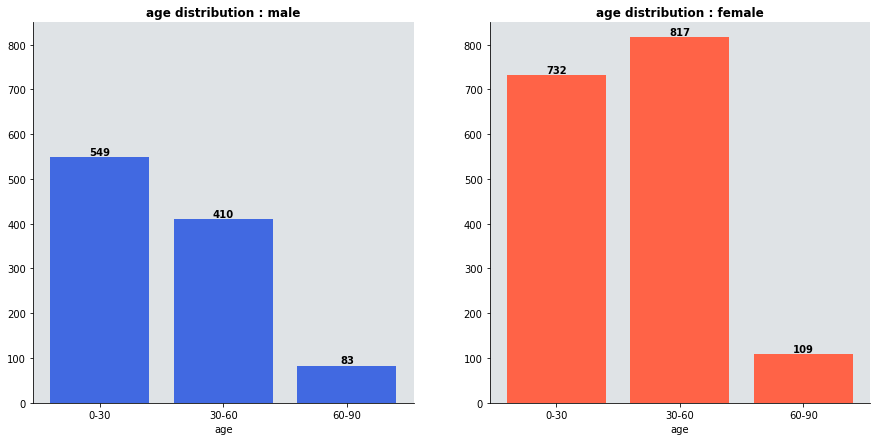

In [11]:
bins = list(range(0, 91, 30))
bins_label = [str(x) + "-" + str(x+30) for x in bins]
mask_data['age_level'] = pd.cut(mask_data['age'] ,bins, right=False, labels=bins_label[:-1])

# 데이터 분포 표시
grp = mask_data.groupby('gender')['age_level'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(grp['male'].index, grp['male'], color='royalblue', zorder=5)
axes[1].bar(grp['female'].index, grp['female'], color='tomato', zorder=5)

# 제목 설정
axes[0].set_title('age distribution : male', fontweight='semibold')
axes[1].set_title('age distribution : female', fontweight='semibold')

# 배경설정, xlaebl설정, 축제거
for ax in axes:
    ax.set_facecolor('#DFE3E6')
    ax.set_xlabel('age')
    ax.set_ylim(0, 850)
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

# bar별 개수 표시
for idx, value in zip(grp['male'].index, grp['male']):
    axes[0].text(idx, value+5, s=value, ha='center', fontweight='bold', zorder=5)
    
for idx, value in zip(grp['female'].index, grp['female']):
    axes[1].text(idx, value+5, s=value, ha='center', fontweight='bold', zorder=5)